In [2]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import pickle
import plots

print("Imported Modules ...")

Imported Modules ...


In [3]:
with open('../models/decoupled.pkl', 'rb') as handle:
    data = pickle.load(handle)

In [4]:
plots.ou_noise_by_params(data)

KeyError: 'runtime'

In [23]:
# actual duration is 3200ms but we throw away the first 200ms
skip = 0
duration = 300 
dt = 1.0

In [24]:
# rates
v_e1 = data['model_results']['net']['v_all_neurons_e']
v_e2 = data['model_results']['net']['v_all_neurons_e2']
v_i1 = data['model_results']['net']['v_all_neurons_i1']
v_i2 = data['model_results']['net']['v_all_neurons_i2']


v_e1 = v_e1[:,skip:duration + skip]
v_e2 = v_e2[:,skip:duration + skip]
v_i1 = v_i1[:,skip:duration + skip]
v_i2 = v_i2[:,skip:duration + skip]

# signal
ext_signal_1_mean = data['input_mean_1']
ext_signal_1_sigma = data['input_sigma_1']
ext_signal_1_mean = ext_signal_1_mean[skip:duration + skip]

# sum up voltages of excitatory Neuron Groups
lfp1 = np.sum(v_e1,axis=0)/1000
lfp2 = np.sum(v_e2,axis=0)/1000

# sum up voltages of inhibitory Neuron Groups
inh1 = np.sum(v_i1,axis=0)/1000
inh2 = np.sum(v_i2,axis=0)/1000

# time
t = np.linspace(0,duration,int(duration/dt))

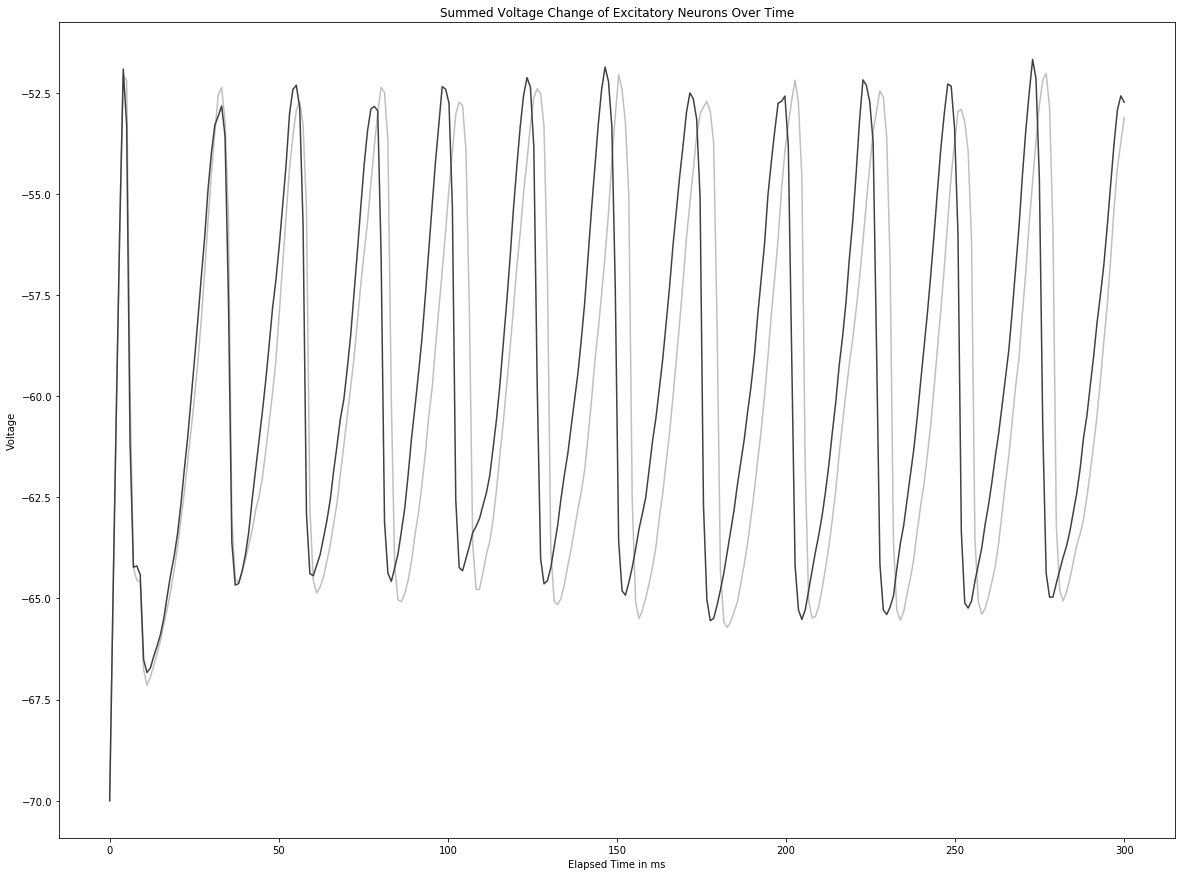

In [25]:
plots.plot_summed_voltage(
    title='Summed Voltage Change of Excitatory Neurons Over Time',
    key="excitatory",
    lfp1=lfp1,
    lfp2=lfp2,
    duration=duration,
    dt=dt,
    save=False
)

Generate PSD plot ...


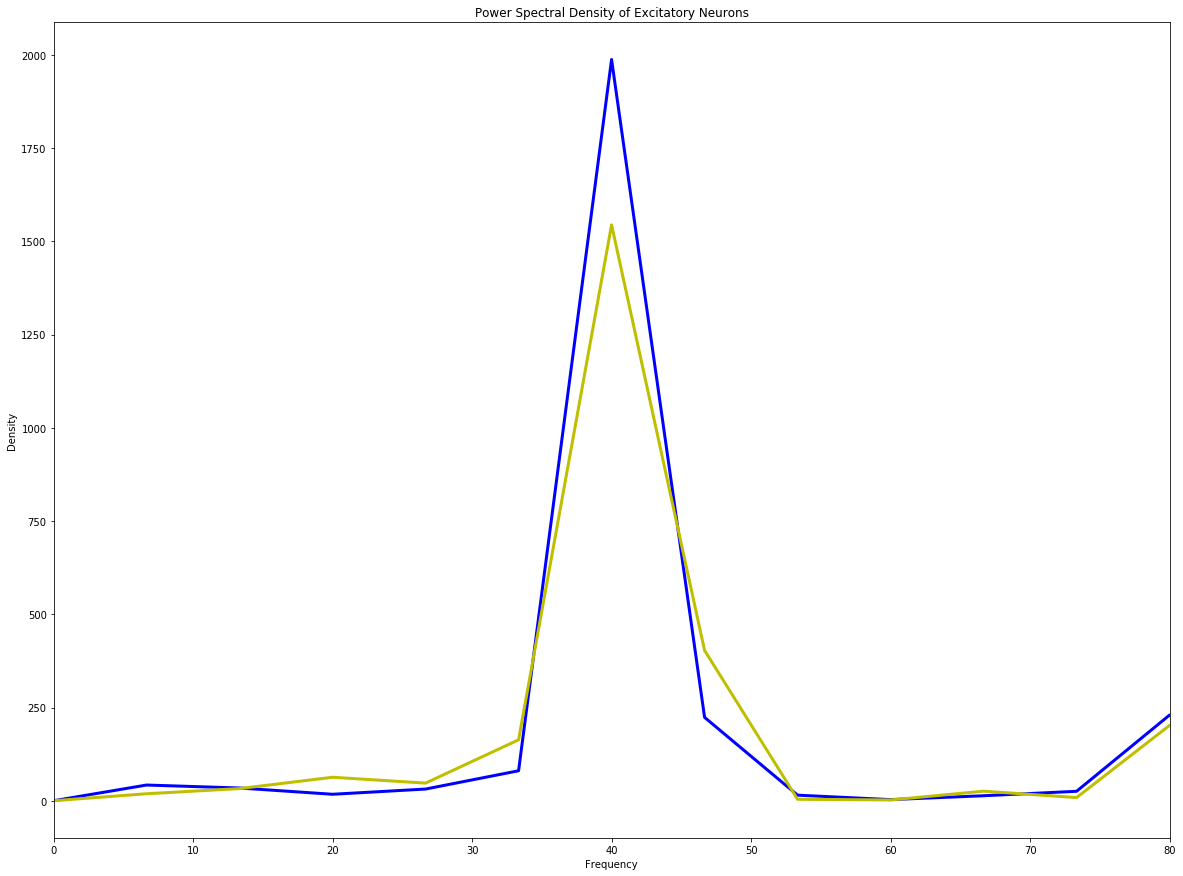

In [26]:
plots.psd(title="Power Spectral Density of Excitatory Neurons",
          key="excitatory",
          lfp1=lfp1, lfp2=lfp2, duration=300, dt=1.0, save=False)

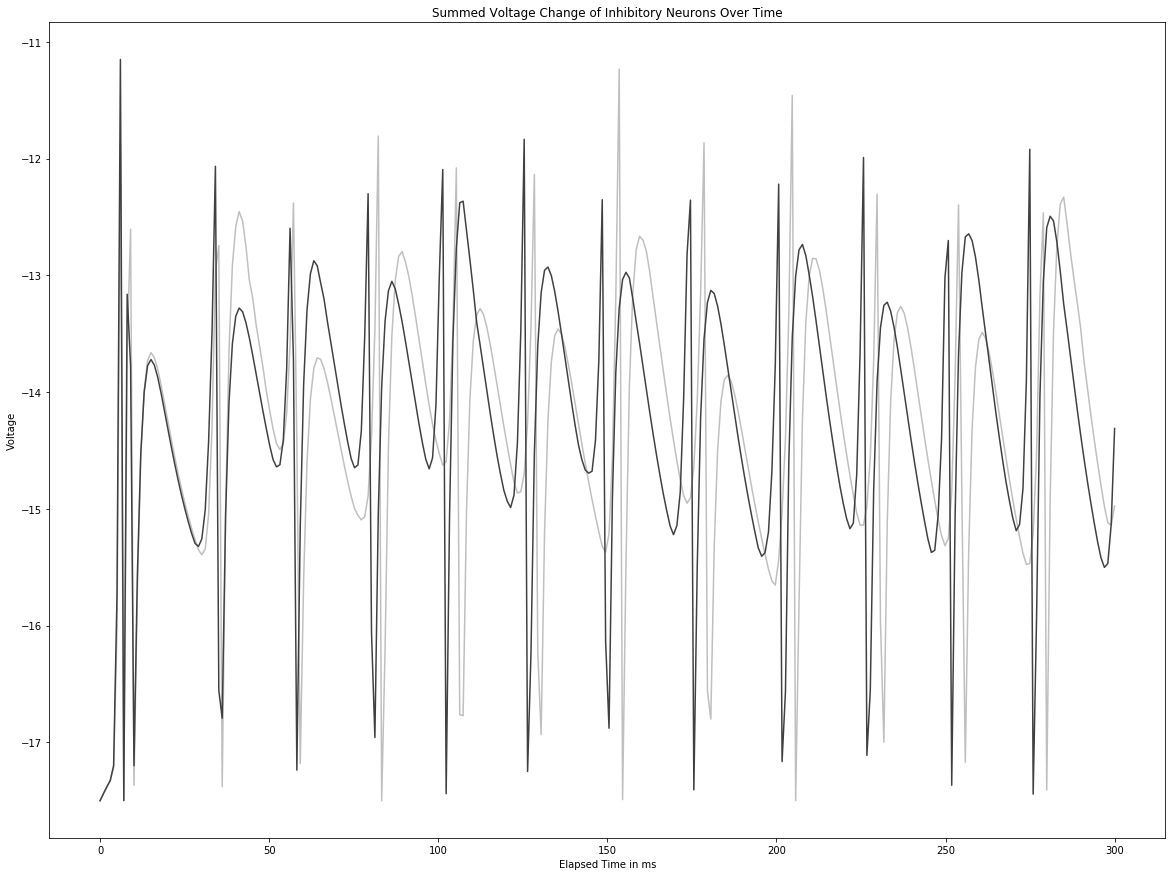

In [27]:
plots.plot_summed_voltage(title='Summed Voltage Change of Inhibitory Neurons Over Time',
                          key="inhibitory",
                          lfp1=inh1,
                          lfp2=inh2,
                          duration=duration,
                          dt=dt,
                          save=False)

Generate PSD plot ...


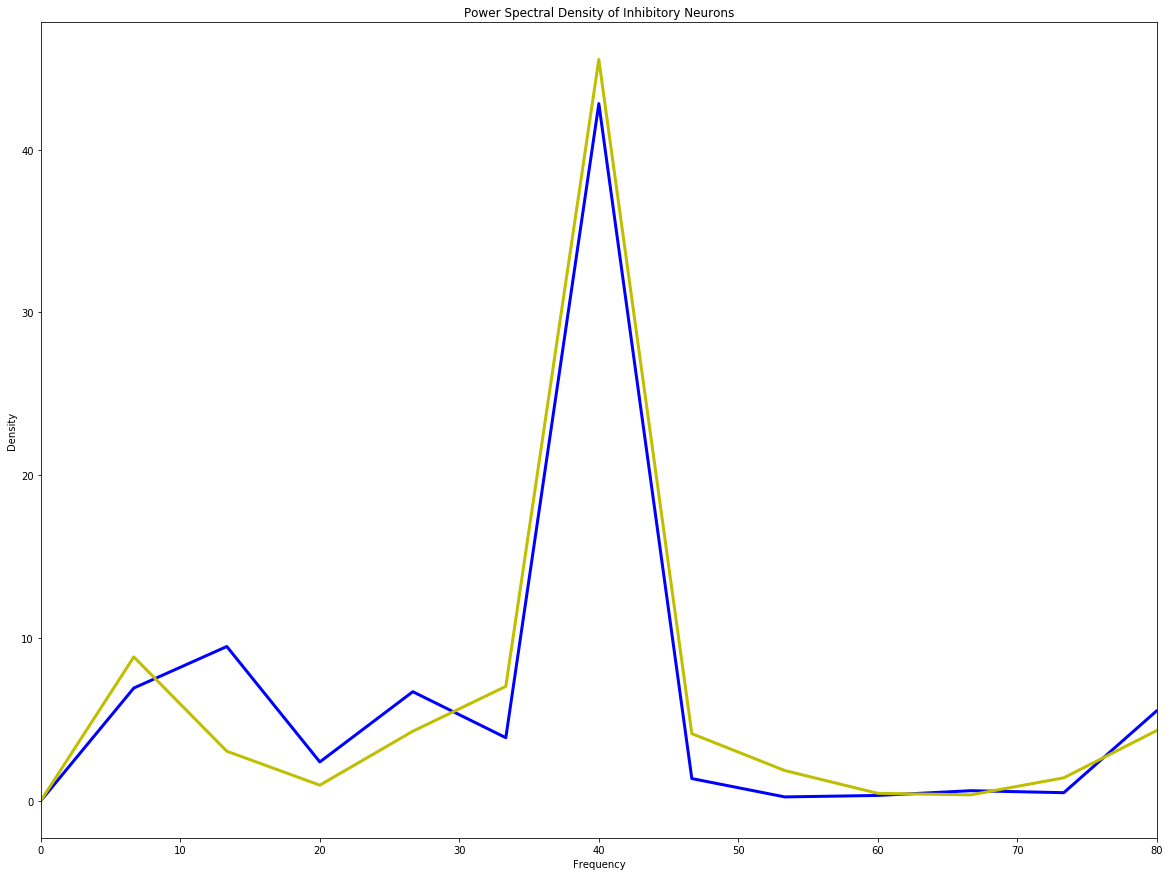

In [28]:
plots.psd(title="Power Spectral Density of Inhibitory Neurons",
              key="inhibitory",
              lfp1=inh1, lfp2=inh2, duration=300, dt=1.0, save=False)

In [29]:
# spikes
s_e1 = data['model_results']['net']['net_spikes_e']
s_e2 = data['model_results']['net']['net_spikes_e2']
s_i1 = data['model_results']['net']['net_spikes_i1']
s_i2 = data['model_results']['net']['net_spikes_i2']


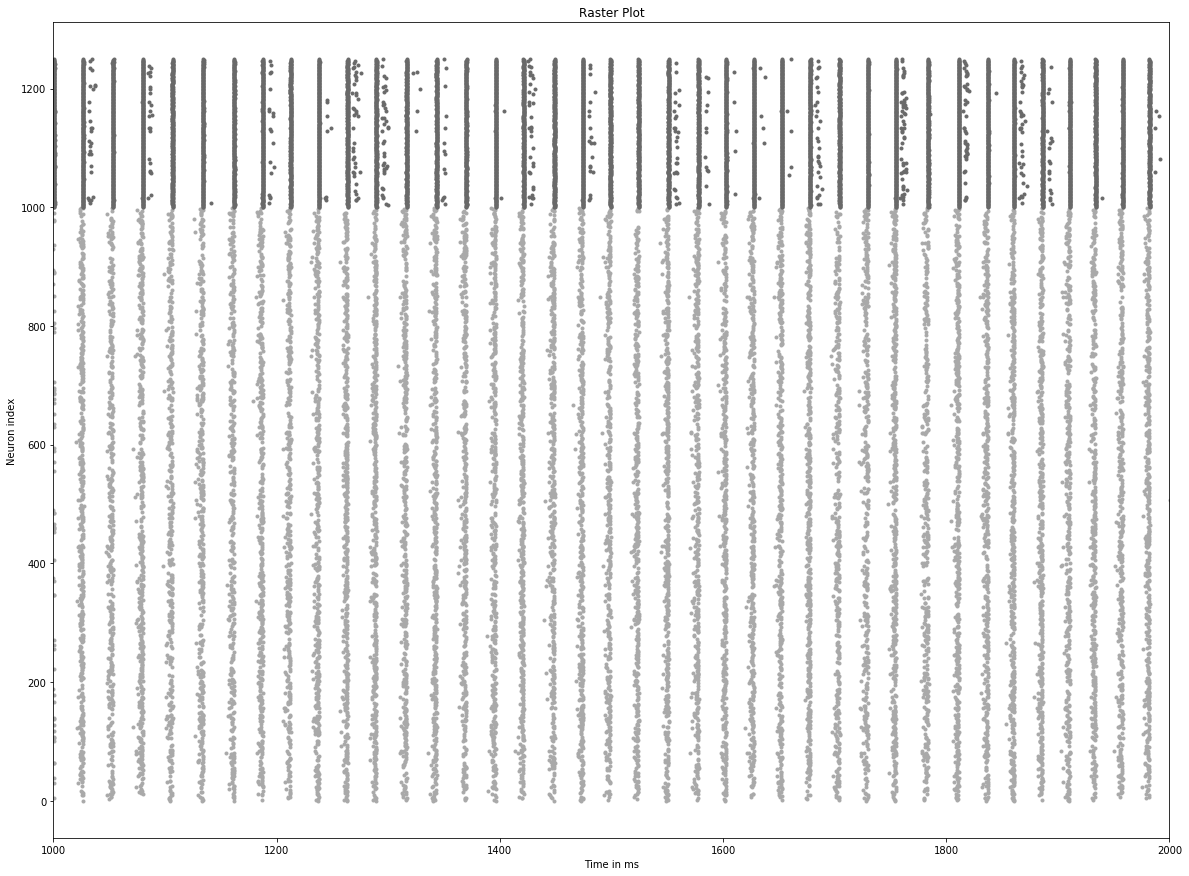

In [30]:
plots.plot_raster(s_e=s_e1, s_i=s_i1, x_left=1000, x_right=2000, save=False)

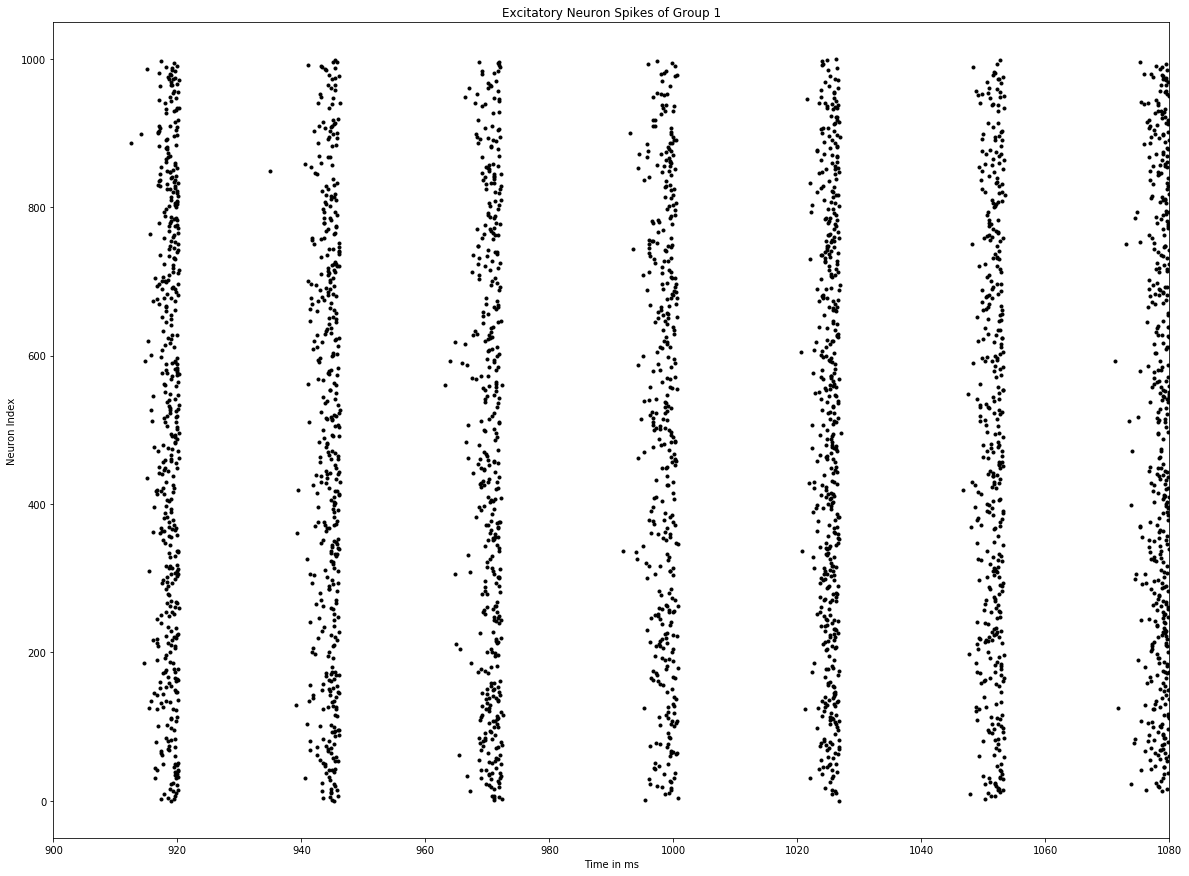

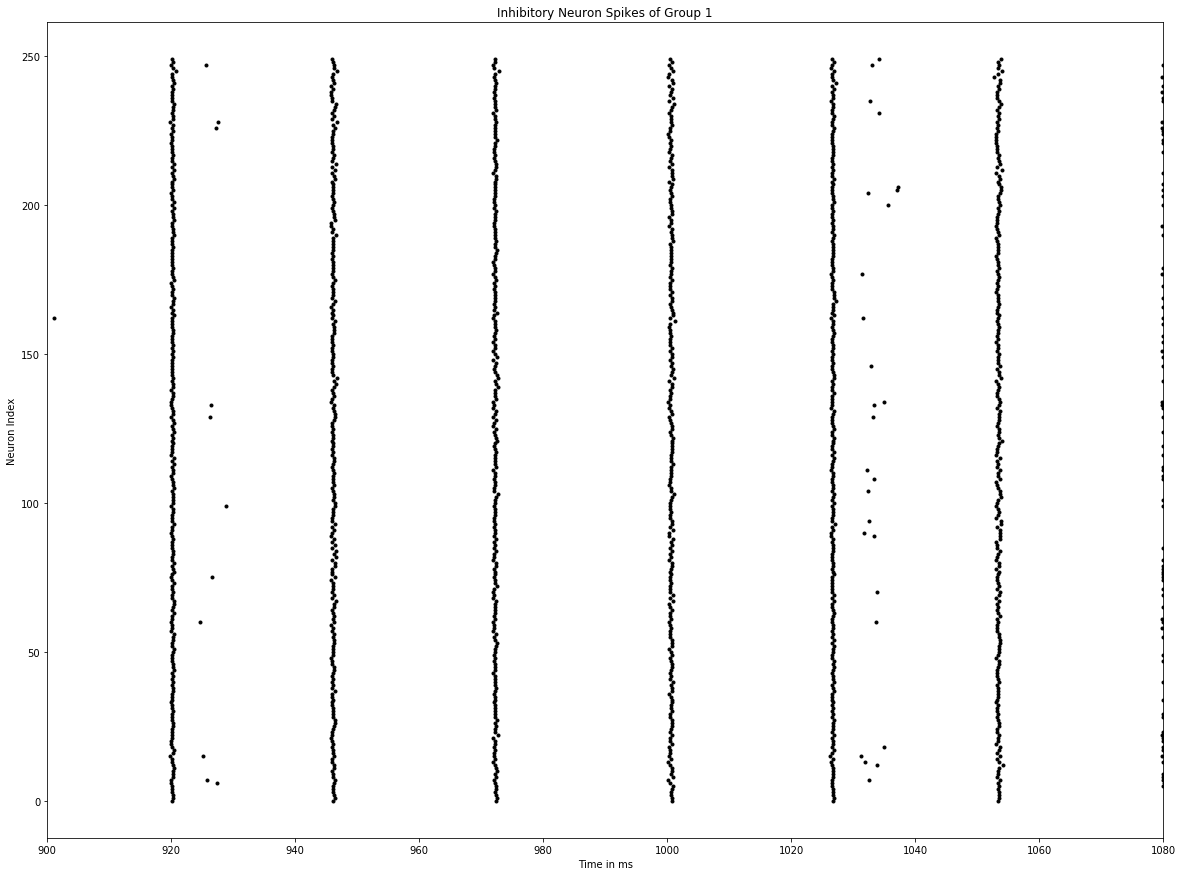

In [31]:
# Raster Plot
fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.set_title("Excitatory Neuron Spikes of Group 1")
ax.set_xlabel("Time in ms")
ax.set_ylabel("Neuron Index")
ax.plot(s_e1[1]*1000, s_e1[0], 'k.', c='black')
ax.set_xlim([900, 1080])
plt.show()

fig = plt.figure(figsize=[20,15])
ax  = fig.add_subplot(111)
ax.set_title("Inhibitory Neuron Spikes of Group 1")
ax.set_xlabel("Time in ms")
ax.set_ylabel("Neuron Index")
ax.plot(s_i1[1]*1000, s_i1[0],'k.', c='black')
ax.set_xlim([900, 1080])
plt.show()

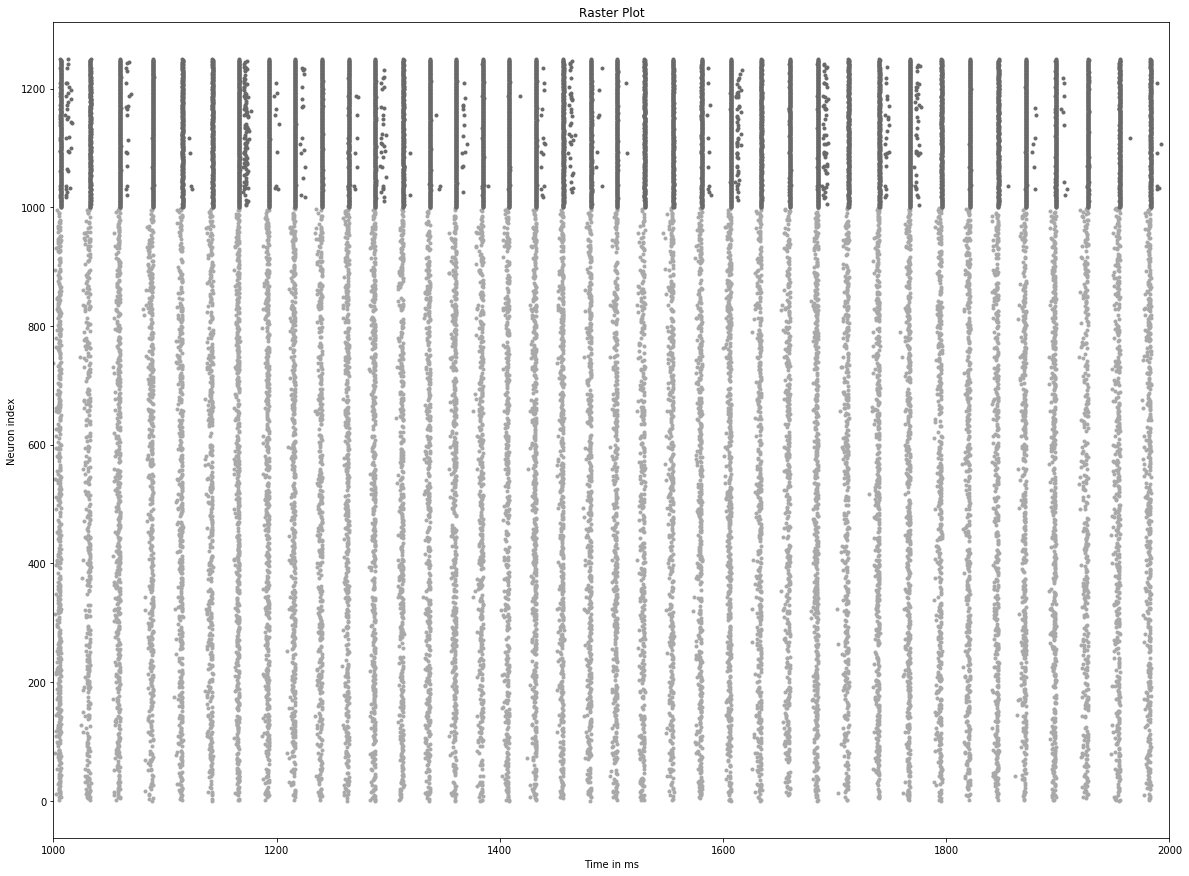

In [32]:
plots.plot_raster(s_e=s_e2, s_i=s_i2, x_left=1000, x_right=2000, key="group2_wide", save=False)

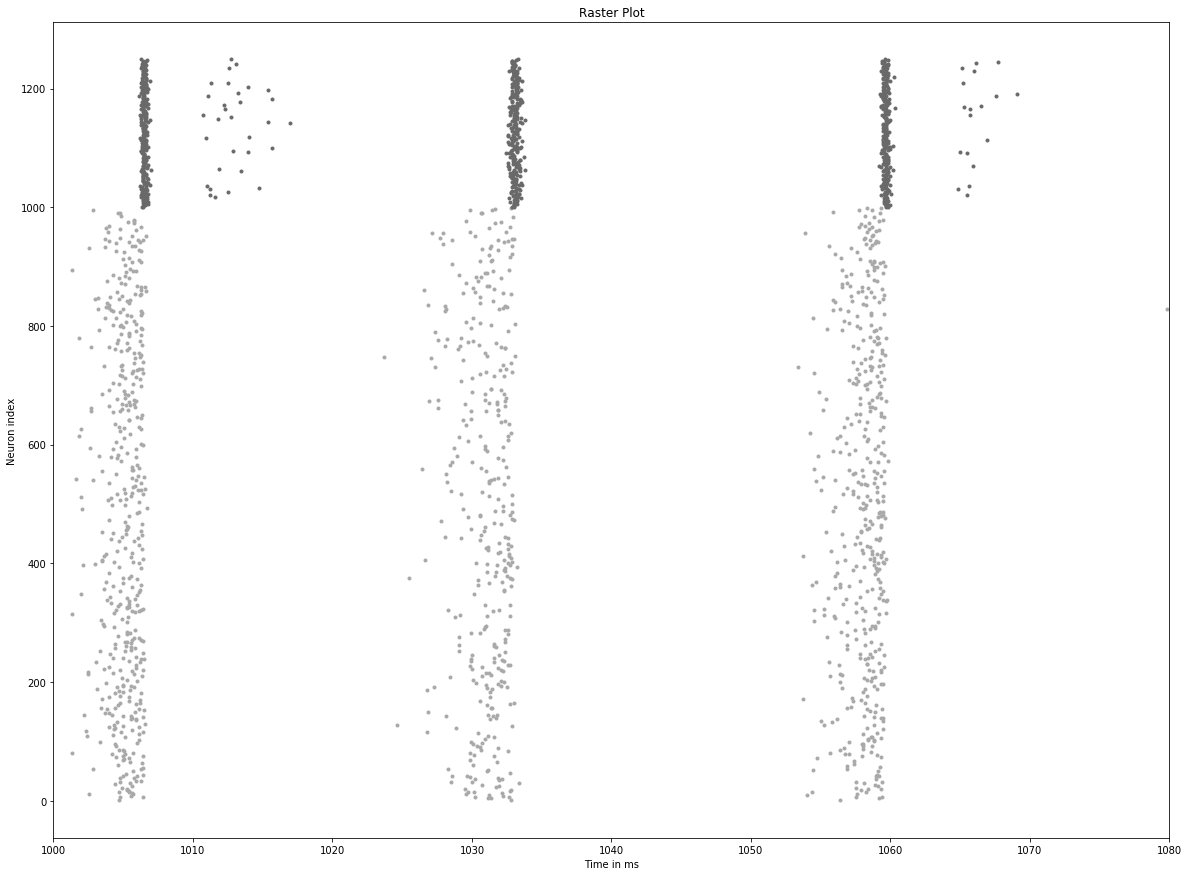

In [33]:
plots.plot_raster(s_e=s_e2, s_i=s_i2, x_left=1000, x_right=1080, key="group2_narrow", save=False)